In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [19]:
conn = sqlite3.connect("../data/vnexpress.db")
df = pd.read_sql_query("SELECT * FROM article", conn)
conn.close()

In [20]:
len(df)

374

In [21]:
df["date"] = pd.to_datetime(df["time"]).dt.date
#df["month"] = pd.to_datetime(df["time"]).dt.to_period("M")

In [22]:
# Đếm theo ngày
daily_counts = df.groupby("date").size()
# Đếm theo tháng
#monthly_counts = df.groupby("month").size()

### `Biểu đồ Stacked`

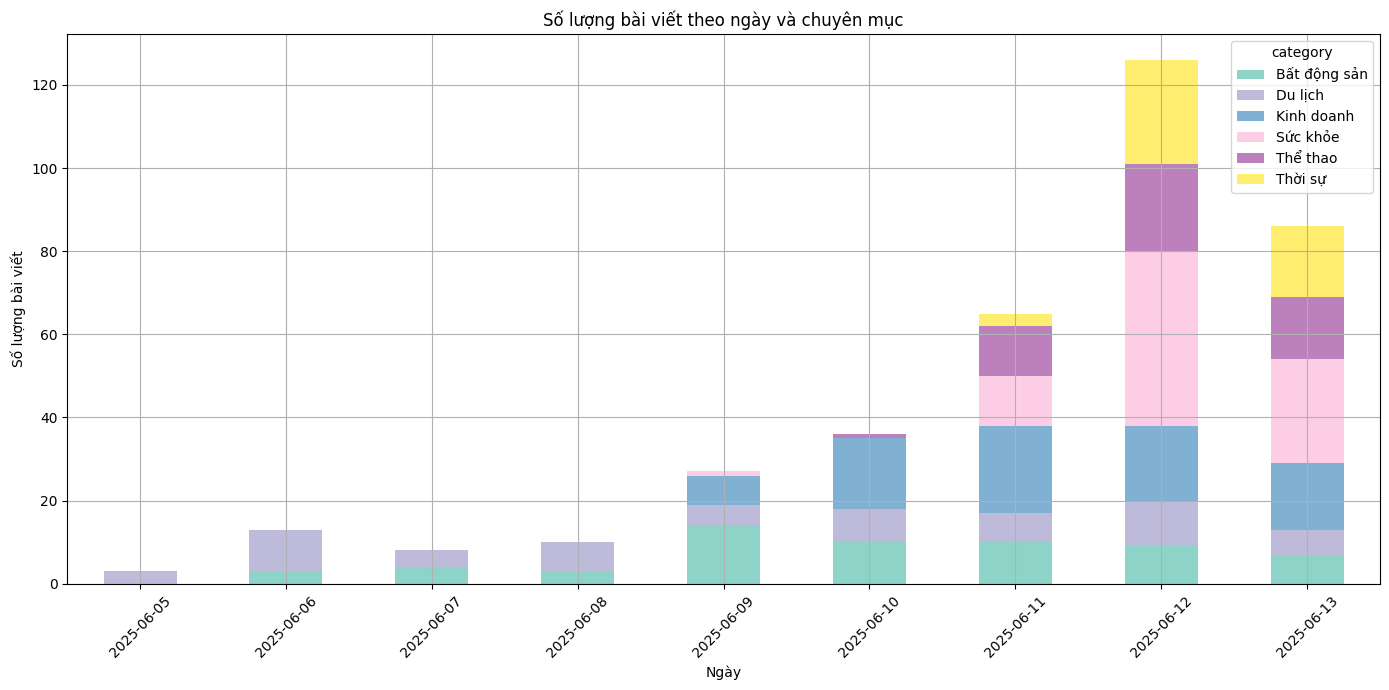

In [26]:
category_day = df.groupby(["date","category"]).size().unstack(fill_value=0)
# Vẽ biểu đồ stacked
category_day.plot(kind="bar", stacked=True, figsize=(14,7), colormap="Set3")
plt.title("Số lượng bài viết theo ngày và chuyên mục")
plt.xlabel("Ngày")
plt.ylabel("Số lượng bài viết")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### `Vẽ biểu đồ tròn theo thể loại`

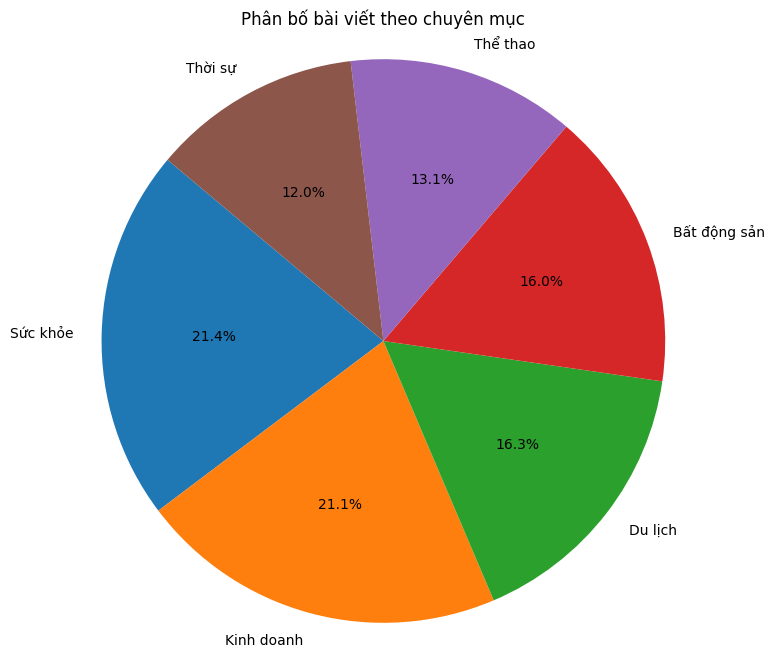

In [25]:
category_count = df["category"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(category_count, labels=category_count.index, autopct="%1.1f%%", startangle=140)
plt.title("Phân bố bài viết theo chuyên mục")
plt.axis("equal");